In [1]:
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 导入所有分析模块
from data_loader import data_loader
from data_cleaner import data_cleaner
from analyzer import data_analyzer
from visualizer import data_visualizer
from funnel_analyzer import funnel_analyzer
from retention_analyzer import retention_analyzer
from value_analyzer import value_analyzer
from product_analyzer import product_analyzer
from recommender import recommender
from time_series_analyzer import time_series_analyzer
from predictive_model import predictive_model

# 导入整合模块
from project_integrator import project_integrator
from documentation_generator import doc_generator
from config import PROCESSED_DATA_PATH

print("=== 项目整合与综合报告 ===")
print("开始项目最终整合和报告生成...")

=== 项目整合与综合报告 ===
开始项目最终整合和报告生成...


In [2]:
print("步骤1: 加载数据并执行基础分析")

# 加载清洗后的数据
df = pd.read_csv(PROCESSED_DATA_PATH, parse_dates=['datetime'])
df['date'] = pd.to_datetime(df['date'])

print(f"数据加载完成: {len(df):,} 条记录")

# 执行基础分析
basic_analysis = data_analyzer.basic_analysis(df)
user_analysis = data_analyzer.user_behavior_analysis(df)

print("✅ 基础分析完成")

步骤1: 加载数据并执行基础分析
数据加载完成: 499,997 条记录
基础统计分析
用户行为分析
pv:447,816次89.56%
cart:27,583次5.52%
fav:14,479次2.90%
buy:10,119次2.02%

基础指标
总用户数346,424
总商品数295,252
总类目数5,715
总行为数499,997
用户活跃度统计
  平均每个用户行为数: 1.4
  平均活跃天数: 1.3
  平均浏览商品数: 1.4
  最活跃用户行为数: 12

用户价值分层:
中等价值用户:258478 (74.61%)
✅ 基础分析完成


In [3]:
print("步骤2: 执行各模块分析汇总")

analyses_dict = {
    'basic': basic_analysis,
    'user_analysis': user_analysis
}

# 转化漏斗分析
print("执行转化漏斗分析...")
funnel_df = funnel_analyzer.analyze_conversion_funnel(df)
dropoff_df = funnel_analyzer.analyze_funnel_dropoff(df, funnel_df)
analyses_dict['funnel'] = funnel_df
analyses_dict['funnel_dropoff'] = dropoff_df

# 用户留存分析
print("执行用户留存分析...")
retention_results = retention_analyzer.calculate_user_retention(df)
analyses_dict['retention'] = retention_results

# RFM用户价值分析
print("执行RFM用户价值分析...")
user_rfm = value_analyzer.calculate_rfm_scores(df)
user_rfm_with_scores, segment_counts = value_analyzer.assign_rfm_scores(user_rfm)
analyses_dict['rfm'] = {
    'user_rfm': user_rfm_with_scores,
    'segment_counts': segment_counts
}

# 商品分析
print("执行商品分析...")
product_stats = product_analyzer.analyze_product_popularity(df)
category_stats = product_analyzer.analyze_category_performance(df, product_stats)
association_rules = product_analyzer.find_product_associations(df, min_support=0.005)
analyses_dict['product_stats'] = product_stats
analyses_dict['category_stats'] = category_stats
analyses_dict['association_rules'] = association_rules

# 时间序列分析
print("执行时间序列分析...")
time_series_data = time_series_analyzer.prepare_time_series_data(df)
trend_analysis, ts_with_trends = time_series_analyzer.analyze_trends(time_series_data)
decomposition = time_series_analyzer.analyze_seasonality(ts_with_trends, 'daily_actions')
analyses_dict['time_series'] = {
    'ts_data': ts_with_trends,
    'trend_analysis': trend_analysis,
    'decomposition': decomposition
}

# 预测模型
print("执行预测模型...")
features_df = predictive_model.prepare_features(ts_with_trends, 'daily_purchases', lag_days=7)
model_results = predictive_model.train_models(features_df, 'daily_purchases', test_size=0.2)
feature_importance = predictive_model.analyze_feature_importance(features_df, 'daily_purchases')
forecast_df = predictive_model.predict_future(features_df, 'daily_purchases', days=7)
analyses_dict['model_results'] = model_results
analyses_dict['feature_importance'] = feature_importance
analyses_dict['forecast'] = forecast_df

print("✅ 所有模块分析完成")

步骤2: 执行各模块分析汇总
执行转化漏斗分析...
===用户漏斗转化分析===
转化漏斗数据：
   步骤     用户数     转化率  步骤转化率
0  浏览  318585  100.00   0.00
1  加购   26579    8.34   8.34
2  收藏   13677    4.29  51.46
3  购买    9995    3.14  73.08

===分析漏斗流失点
关键流失点分析:
  从步骤 到步骤   流失用户数    流失率  步骤转化率
0  浏览  加购  306939  96.34   3.66
1  加购  收藏   26188  98.53   1.47
2  收藏  购买   13515  98.82   1.18
执行用户留存分析...
=== 用户留存分析 ===
计算同期群留存...
同期群留存矩阵（前5行）:
days_since_first       0     1     2     3     4     5     6     7     8     \
cohort_week                                                                   
2013-12-30/2014-01-05   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-10-03/2016-10-09   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-04-10/2017-04-16   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-08-07/2017-08-13   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-08-21/2017-08-27   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

days_since_first       9     ...  28    34    52  

In [4]:
integrated_results = project_integrator.integrate_all_analyses(df, analyses_dict)

# 计算业务KPIs
kpis = project_integrator.calculate_business_kpis(df, integrated_results)

# 生成执行摘要
executive_summary = project_integrator.generate_executive_summary()

print("✅ 项目整合完成")

=== 项目分析结果整合 ===
✅ 所有分析结果整合完成

=== 关键业务指标计算 ===
关键业务指标:

user_metrics:
  dau: 12762.19
  警告：user_growth_rate 的值 0.00% 不是有效数值，已默认设为0.0
  user_growth_rate: 0.00
  avg_retention_rate: 9.13
  high_value_user_ratio: 27.36

conversion_metrics:
  overall_conversion_rate: 3.14
  browse_to_cart_rate: 8.34
  cart_to_purchase_rate: 1.18

product_metrics:
  avg_product_conversion: 65.28
  active_product_ratio: 3.22
  top_category_coverage: 11.65

forecast_metrics:
  next_7days_avg: -377.33
  prediction_confidence: 291.81

=== 生成执行摘要 ===
执行摘要生成完成
✅ 项目整合完成


步骤4: 创建综合数据看板
生成综合数据看板...
✅ 综合看板已保存至: D:\新建文件夹\电商用户行为分析\reports\figures\comprehensive_dashboard.png


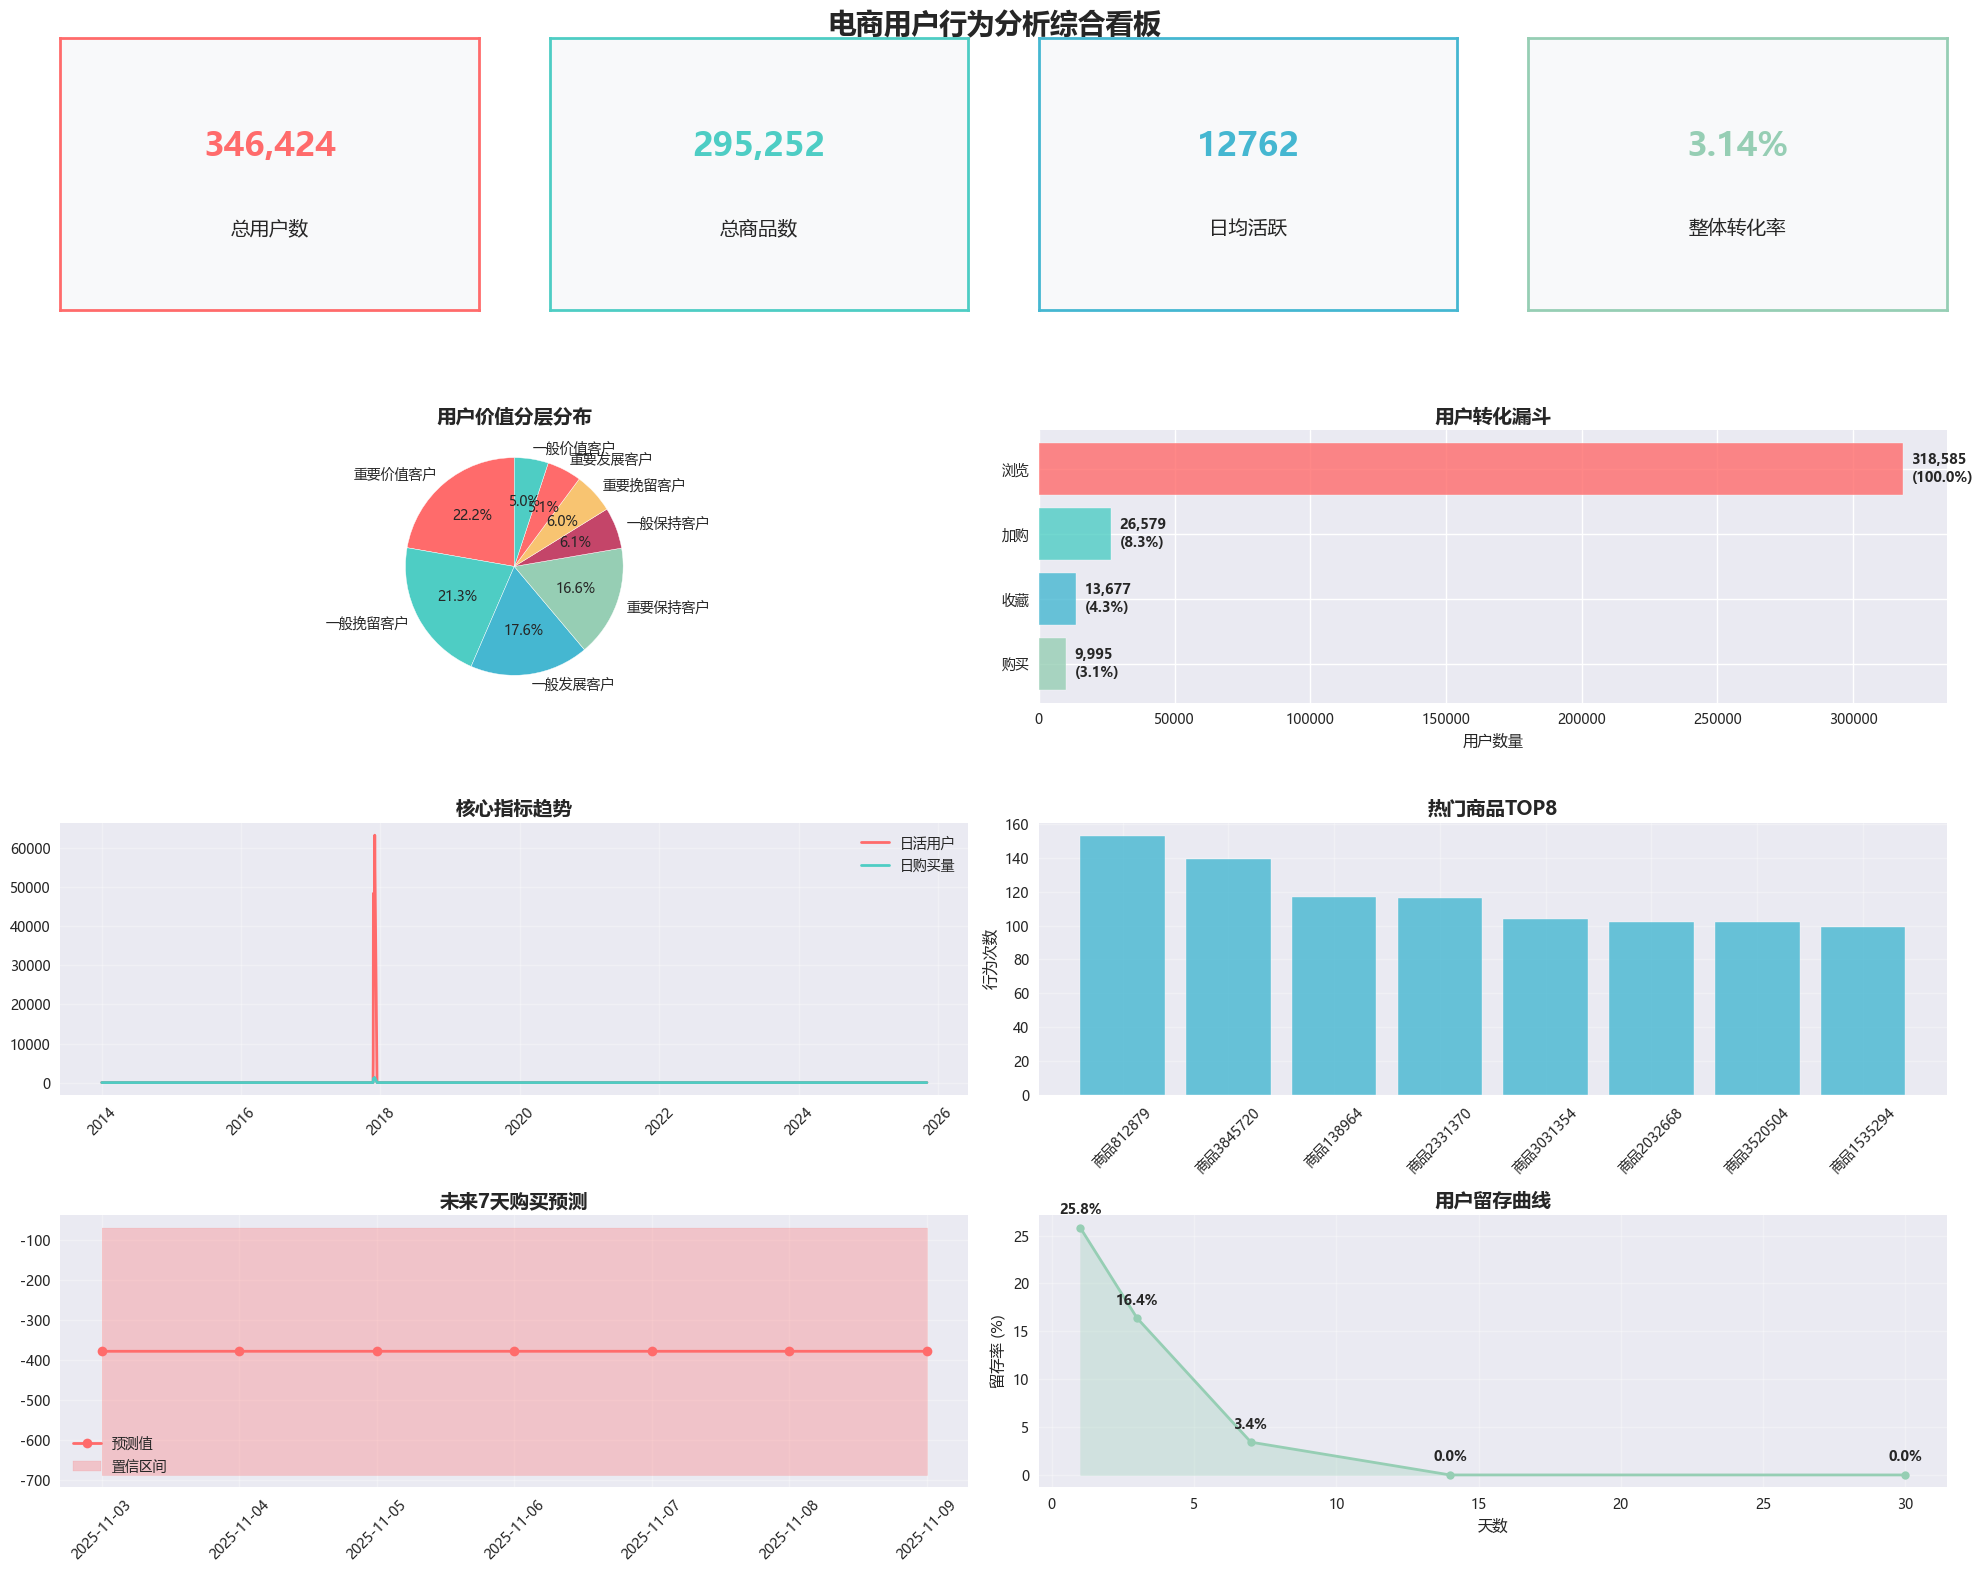

✅ 综合数据看板生成完成


In [5]:
print("步骤4: 创建综合数据看板")

# 生成综合数据看板
dashboard = project_integrator.create_comprehensive_dashboard()

print("✅ 综合数据看板生成完成")

In [6]:
print("步骤5: 生成最终项目报告")

# 生成最终报告
final_report_path = project_integrator.generate_final_report()

print("✅ 最终项目报告生成完成")

步骤5: 生成最终项目报告

=== 生成最终项目报告 ===
✅ 最终项目报告已生成: D:\新建文件夹\电商用户行为分析\reports\final_reports\电商用户行为分析最终报告.md
✅ 最终项目报告生成完成


In [7]:
print("步骤6: 生成项目文档")

# 生成README
readme_path = doc_generator.generate_readme(
    project_integrator.project_metrics,
    project_integrator.integrated_results
)

# 生成技术文档
tech_doc_path = doc_generator.generate_technical_documentation(
    project_integrator.project_metrics
)

print("✅ 项目文档生成完成")

步骤6: 生成项目文档
=== 生成README文档 ===
✅ README文档已生成: D:\新建文件夹\电商用户行为分析\notebooks\README.md
生成技术文档...
✅ 技术文档已生成: D:\新建文件夹\电商用户行为分析\reports\final_reports\技术文档.md
✅ 项目文档生成完成


In [8]:
print("步骤7: 项目打包")

# 创建项目发布包
release_dir = doc_generator.create_project_package()

print("✅ 项目打包完成")

步骤7: 项目打包
=== 创建项目打包 ===
✅ 项目打包完成: D:\新建文件夹\电商用户行为分析\notebooks\release
✅ 项目打包完成
